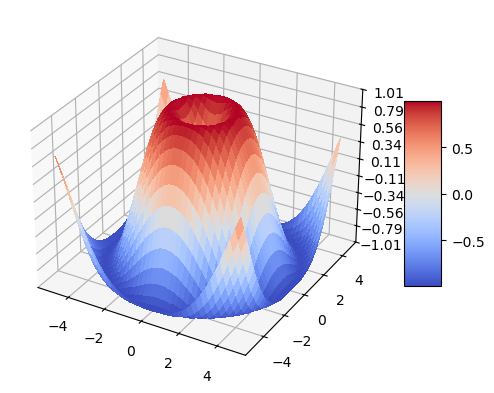

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [3]:
foundDigits = [((49.0, 148.0), 1),
 ((30.0, 148.0), 1),
 ((48.5, 128.0), 3),
 ((49.0, 108.0), 1),
 ((48.5, 88.0), 3),
 ((47.5, 67.5), 5),
 ((49.0, 68.0), 1),
 ((91.5, 45.5), 5),
 ((153.0, 46.0), 1),
 ((132.5, 46.0), 2),
 ((113.0, 46.0), 1),
 ((92.5, 46.0), 4),
 ((72.5, 46.0), 2),
 ((153.0, 27.0), 1),
 ((112.5, 27.0), 2)]

import math
def computeCosts(A, alpha, B, beta):
    costs = 0
    for (center, value) in foundDigits:
        predictionX  = round((center[0] - A) / alpha)
        predictionY = round((center[1] - B) / beta)
        costsX = (predictionX * alpha + A - center[0]) ** 2
        costsY = (predictionY * beta + B - center[1]) ** 2

        exponent = (math.exp(-costsX) + math.exp(-costsY))
        costs += 1/exponent #+ alpha**2 + beta**2
        #return math.log(1 / exponent)
        #return (1 / exponent)
        #print(center, costsX, costsY)
        costs += costsX
    return costs

As = np.arange(60, 80, 1)
alphas = np.arange(10, 30, 1)
Bs = np.arange(60, 80, 1)
betas = np.arange(12, 30, 1)
X, Y, U, V = np.meshgrid(As, alphas, Bs, betas)
Z = np.vectorize(computeCosts)(X, Y, U, V)

minIndex = np.unravel_index(Z.argmin(), Z.shape)
print(minIndex)
print(Z[minIndex])
#print(Z)
#print(Z[10,10,10,10])

'''
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
'''

#plt.pcolor(X, Y, Z)
#plt.show()

(11, 10, 7, 8)
37.489249533383564


'\nfig, ax = plt.subplots(subplot_kw={"projection": "3d"})\n\nsurf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=False)\n\n# Customize the z axis.\n#ax.set_zlim(-1.01, 1.01)\nax.zaxis.set_major_locator(LinearLocator(10))\n# A StrMethodFormatter is used automatically\nax.zaxis.set_major_formatter(\'{x:.02f}\')\n\n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=0.5, aspect=5)\n\nplt.show()\n'

In [6]:
import determineTable
foundDigits = [((49.0, 148.0), 1),
 ((30.0, 148.0), 1),
 ((48.5, 128.0), 3),
 ((49.0, 108.0), 1),
 ((48.5, 88.0), 3),
 ((47.5, 67.5), 5),
 ((49.0, 68.0), 1),
 ((91.5, 45.5), 5),
 ((153.0, 46.0), 1),
 ((132.5, 46.0), 2),
 ((113.0, 46.0), 1),
 ((92.5, 46.0), 4),
 ((72.5, 46.0), 2),
 ((153.0, 27.0), 1),
 ((112.5, 27.0), 2)]


In [8]:



centers = [center for center,_ in foundDigits]
xs = set([int(center[0]) for center in centers])
ys = set([int(center[1]) for center in centers])
alphas = set([x2 - x1 for x1 in xs for x2 in xs if x2- x1 > 0 and x2-x1 > 5])
betas = set([y2 - y1 for y1 in ys for y2 in ys if y2 - y1 > 0 and y2-y1 > 5])   # make sure we don't take a value that is too low

bCandidate = min(ys)
betaCandidate = sum(betas)/len(betas)

best = None
bestValue = -1
for alpha in alphas:
    for A in xs:
        value = determineTable.computeCosts(foundDigits, A, alpha, bCandidate, betaCandidate)
        if (best is None or value < bestValue):
            best = (A, alpha)
            bestValue = value

(a, alpha) = best
print(best, bestValue)

best = None
bestValue = -1
for beta in betas:
    for b in ys:
        value = determineTable.computeCosts(foundDigits, a, alpha, b, beta)
        if (best is None or value < bestValue):
            best = (b, beta)
            bestValue = value

print(best, bestValue)



(49, 21) 625.4476837001123
(67, 20) 37.489249533383564


In [19]:
print(computeCosts(70, 21, 67, 20))
print(computeCosts(70, 21, 67, 10))
print(computeCosts(70, 10, 67, 20))
print(computeCosts(70, 21, 67, 4))

37.489249533383564
37.489249533383564
98.60400646327544
37.489249533383564
